In [766]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [767]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [768]:
#glob.glob("../logs/*/*/*.pkl")

In [914]:
ddf = pandas.DataFrame()
for f in glob.glob("../logs/*/*/*.pkl"):
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d))

In [915]:
df = ddf.copy()

In [916]:
df.shape

(2100, 37)

In [917]:
del df["optimizer"]
del df["blur"]
del df["model_flat_layer"]
del df["transform"]
del df["cuda"]

In [918]:
for i in df.columns:
    if "valid_dataset" in i:
        print (i)
        del df[i]
    if "test_dataset" in i:
        print (i)
        del df[i]
    if "train_dataset_" in i:
        print(i)
        del df[i]

test_dataset
test_dataset_blur
test_dataset_maxmasks
test_dataset_mode
test_dataset_nsamples
test_dataset_seed
train_dataset_blur
train_dataset_maxmasks
train_dataset_mode
train_dataset_nsamples
train_dataset_seed
valid_dataset
valid_dataset_blur
valid_dataset_maxmasks
valid_dataset_mode
valid_dataset_nsamples
valid_dataset_seed


In [919]:
df.head(10)

,batch_size,best_testauc_for_validauc,epoch,maxmasks,model,nsamples,num_epochs,optimizer_lr,penalise_grad,seed,shuffle,testauc,train_dataset,trainloss,validauc
0,32,0.484375,0,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.484375,LungMSDDataset,0.000000,0.453125
1,32,0.492188,1,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.492188,LungMSDDataset,0.009691,0.500000
2,32,0.492188,2,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.546875,LungMSDDataset,0.009424,0.476562
3,32,0.546875,3,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.546875,LungMSDDataset,0.010443,0.507812
4,32,0.492188,4,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.492188,LungMSDDataset,0.007078,0.515625
5,32,0.492188,5,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.476562,LungMSDDataset,0.009229,0.507812
6,32,0.578125,6,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.578125,LungMSDDataset,0.010465,0.562500
7,32,0.578125,7,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.601562,LungMSDDataset,0.010690,0.546875
8,32,0.570312,8,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.570312,LungMSDDataset,0.011127,0.593750
9,32,0.570312,9,256,SimpleCNN,128,100,0.0001,contrast,8,True,0.578125,LungMSDDataset,0.008799,0.593750


In [920]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
print (df.nsamples.unique())
print (df.maxmasks.unique())
print (df.optimizer_lr.unique())

['LungMSDDataset']
['contrast' 'False' 'diff_from_ref']
[128]
[256]
[0.0001]


In [921]:
df = df[(df.nsamples == 128) & (df.optimizer_lr==0.0001)]

In [922]:
#set(df.columns).difference(["nsamples"])

In [923]:
#df[(df.nsamples == 64)]

In [924]:
df[(df.epoch==99)].groupby(["penalise_grad", "epoch", "seed"]).mean()

batch_size  best_testauc_for_validauc  maxmasks  \
penalise_grad epoch seed                                                    
False         99    0             32                   0.476562       256   
                    1             32                   0.718750       256   
                    2             32                   0.671875       256   
                    3             32                   0.570312       256   
                    4             32                   0.515625       256   
                    5             32                   0.585938       256   
                    6             32                   0.507812       256   
                    7             32                   0.609375       256   
                    8             32                   0.664062       256   
                    9             32                   0.578125       256   
contrast      99    0             32                   0.492188       256   
                    1             32                   0.750000       256   
                    2             32                   0.703125       256   
                    3             32                   0.648438       256   
                    4             32                   0.492188       256   
                    5             32                   0.601562       256   
                    6             32                   0.507812       256   
                    7             32                   0.609375       256   
                    8             32                   0.742188       256   
                    9             32                   0.585938       256   
diff_from_ref 99    4             32                   0.492188       256   

                          nsamples  num_epochs  optimizer_lr  shuffle  \
penalise_grad epoch seed                                                
False         99    0          128         100        0.0001     True   
                    1          128         100        0.0001     True   
                    2          128         100        0.0001     True   
                    3          128         100        0.0001     True   
                    4          128         100        0.0001     True   
                    5          128         100        0.0001     True   
                    6          128         100        0.0001     True   
                    7          128         100        0.0001     True   
                    8          128         100        0.0001     True   
                    9          128         100        0.0001     True   
contrast      99    0          128         100        0.0001     True   
                    1          128         100        0.0001     True   
                    2          128         100        0.0001     True   
                    3          128         100        0.0001     True   
                    4          128         100        0.0001     True   
                    5          128         100        0.0001     True   
                    6          128         100        0.0001     True   
                    7          128         100        0.0001     True   
                    8          128         100        0.0001     True   
                    9          128         100        0.0001     True   
diff_from_ref 99    4          128         100        0.0001     True   

                           testauc     trainloss  validauc  
penalise_grad epoch seed                                    
False         99    0     0.484375  5.054749e-01  0.515625  
                    1     0.718750  4.674615e-01  0.679688  
                    2     0.648438  5.651523e-01  0.710938  
                    3     0.570312  5.253893e-01  0.789062  
                    4     0.578125  5.779020e-01  0.617188  
                    5     0.585938  3.965611e-01  0.757812  
                    6     0.507812  6.260260e-01  0.617188  
                    7    

In [925]:
df[(df.epoch==99)].groupby(["penalise_grad"])[["best_testauc_for_validauc"]].count()

,best_testauc_for_validauc
penalise_grad,
False,10
contrast,10
diff_from_ref,1


In [926]:
qq = df[(df.epoch==99)].groupby(["penalise_grad"])[["best_testauc_for_validauc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')
q = q.join(qq.count(),rsuffix='_count')
q

,best_testauc_for_validauc,best_testauc_for_validauc_std,best_testauc_for_validauc_count
penalise_grad,,,
False,0.589844,0.078060,10
contrast,0.613281,0.097734,10
diff_from_ref,0.492188,NaN,1


In [872]:
#subsetdata[subsetdata.penalise_grad == "diff_from_ref"].groupby("seed").count()

False num trials 10
contrast num trials 10
diff_from_ref num trials 1


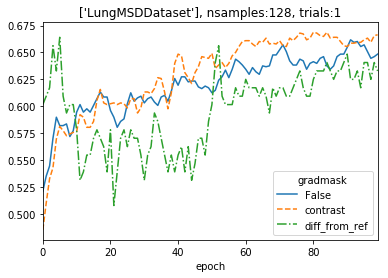

In [929]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df.reindex()
for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):

    thisdata = subsetdata[subsetdata.penalise_grad == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [623]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

AttributeError: 'DataFrame' object has no attribute 'maskblur'

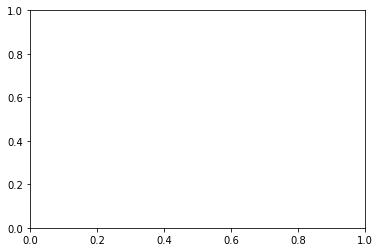

In [402]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

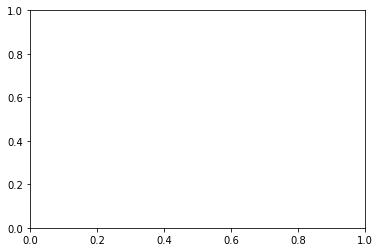

In [403]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

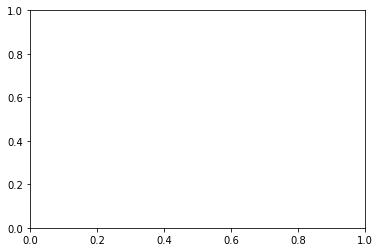

In [404]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));
